# Disease prediction.
---
Cardiovascular disease are among the leading causes of death worldwide, impacting millions of people each year. They are often associated with risk factors such as high blood pressure, diabetes, smoking, and unhealthy lofestyle choises, which contribute to their development and progression.

Maschine learning has emerged as a powerful tool across various fields, particularly in healthcare, where it plays a vital role in diagnosing, predicting, and treating diseases. This report explores the application of ML in predicting cardiovascular diseases, highlightingits potensial to enhace early detection, risk assessment, and patient outcomes.

### Exploratory Data Analysis.
---

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import analysis

In [26]:
df = pd.read_csv('cardio_train.csv', sep=';', index_col=0)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


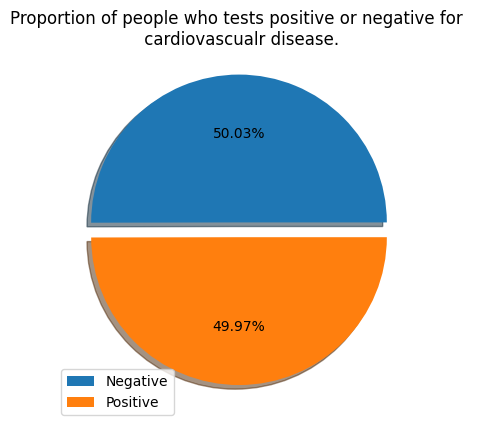

In [27]:
analysis.plot_pos_neg(df);

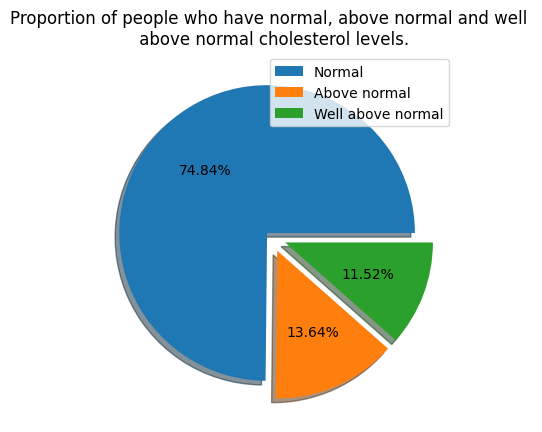

In [28]:
analysis.plot_cholesterol(df);

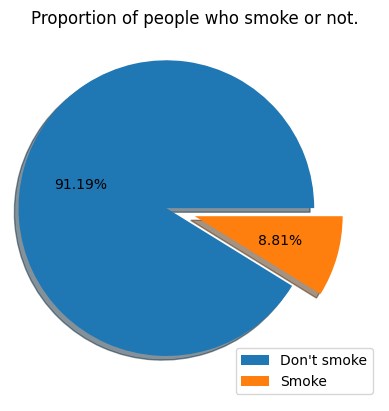

In [29]:
analysis.plot_smoke(df);

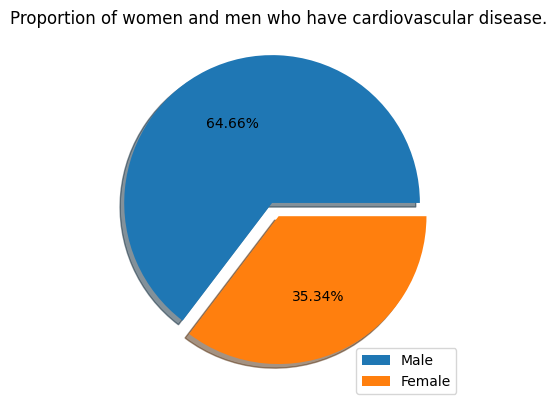

In [30]:
analysis.plot_men_women(df);

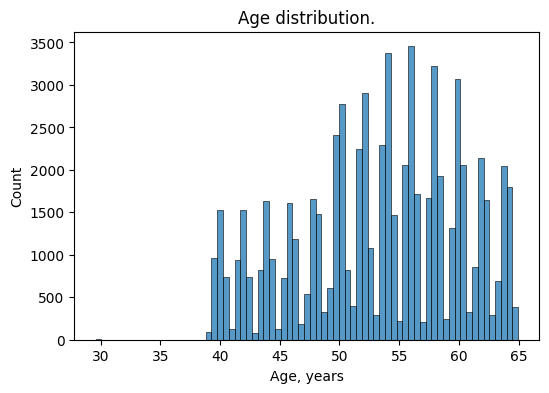

In [31]:
analysis.plot_age(df);

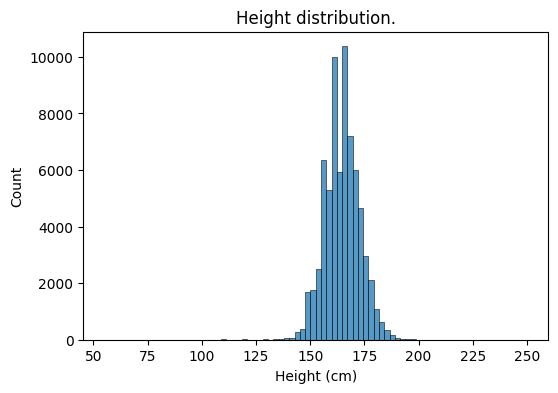

In [32]:
analysis.plot_height(df);

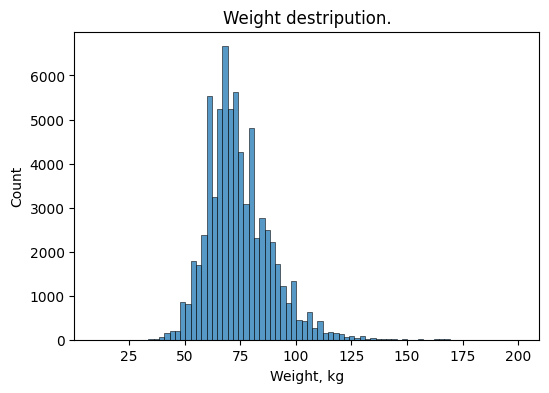

In [33]:
analysis.plot_weight(df);

### Feature Engineering BMI.
---

In [34]:
analysis.bmi(df)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,35.0
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,24.0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,29.0
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0


In [35]:
# outliers bmi
Q1, Q3 = np.quantile(df['bmi'], 0.25), np.quantile(df['bmi'], 0.75)
IQR = Q3 - Q1
threshold = 3
df = df[(df['bmi'] >= Q1 - threshold * IQR) & ( df['bmi'] <= Q3 + threshold * IQR)]

In [36]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,69683.000000,69683.000000,69683.000000,69683.000000,69683.000000,69683.000000,69683.000000,69683.000000,69683.000000,69683.000000,69683.000000,69683.000000,69683.000000
mean,19468.408550,1.350258,164.452564,73.993165,128.784424,96.514788,1.365943,1.225392,0.088286,0.053772,0.803725,0.498945,27.381255
std,2467.543134,0.477054,7.869558,13.900839,154.352248,188.488164,0.679488,0.571060,0.283712,0.225569,0.397181,0.500002,5.025517
min,10798.000000,1.000000,98.000000,21.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000
25%,17663.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,24.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.000000
max,23713.000000,2.000000,250.000000,180.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,48.000000


In [37]:
analysis.bmi_cat(df)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_cat
id,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0,Normal range
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,35.0,Obese (class 1)
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,24.0,Normal range
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,29.0,Over-weight
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0,Normal range


In [38]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,69683.000000,69683.000000,69683.000000,69683.000000,69683.000000,69683.000000,69683.000000,69683.000000,69683.000000,69683.000000,69683.000000,69683.000000,69683.000000
mean,19468.408550,1.350258,164.452564,73.993165,128.784424,96.514788,1.365943,1.225392,0.088286,0.053772,0.803725,0.498945,27.381255
std,2467.543134,0.477054,7.869558,13.900839,154.352248,188.488164,0.679488,0.571060,0.283712,0.225569,0.397181,0.500002,5.025517
min,10798.000000,1.000000,98.000000,21.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000
25%,17663.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,24.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.000000
max,23713.000000,2.000000,250.000000,180.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,48.000000


### Feature Engineering Blood Pressure.
---

In [39]:
# outliers ap_hi
Q1, Q3 = np.quantile(df['ap_hi'], 0.25), np.quantile(df['ap_hi'], 0.75)
IQR = Q3 - Q1
threshold = 1.5
df = df[(df['ap_hi'] >= Q1 - threshold * IQR) & ( df['ap_hi'] <= Q3 + threshold * IQR)]

In [40]:
# outliers ap_lo
Q1, Q3 = np.quantile(df['ap_lo'], 0.25), np.quantile(df['ap_lo'], 0.75)
IQR = Q3 - Q1
threshold = 1.5
df = df[(df['ap_lo'] >= Q1 - threshold * IQR) & ( df['ap_lo'] <= Q3 + threshold * IQR)]

In [41]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63700 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          63700 non-null  int64   
 1   gender       63700 non-null  int64   
 2   height       63700 non-null  int64   
 3   weight       63700 non-null  float64 
 4   ap_hi        63700 non-null  int64   
 5   ap_lo        63700 non-null  int64   
 6   cholesterol  63700 non-null  int64   
 7   gluc         63700 non-null  int64   
 8   smoke        63700 non-null  int64   
 9   alco         63700 non-null  int64   
 10  active       63700 non-null  int64   
 11  cardio       63700 non-null  int64   
 12  bmi          63700 non-null  float64 
 13  bmi_cat      63700 non-null  category
dtypes: category(1), float64(2), int64(11)
memory usage: 6.9 MB


In [42]:
analysis.pressure_cat(df)

df.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_cat,pressure_cat
id,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0,Normal range,Healthy
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,35.0,Obese (class 1),Stage 2 hypertension
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,24.0,Normal range,Stage 1 hypertension
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,29.0,Over-weight,Stage 2 hypertension
8,21914,1,151,67.0,120,80,2,2,0,0,0,0,29.0,Over-weight,Healthy


### Visualization of Diseases Proportions.
---

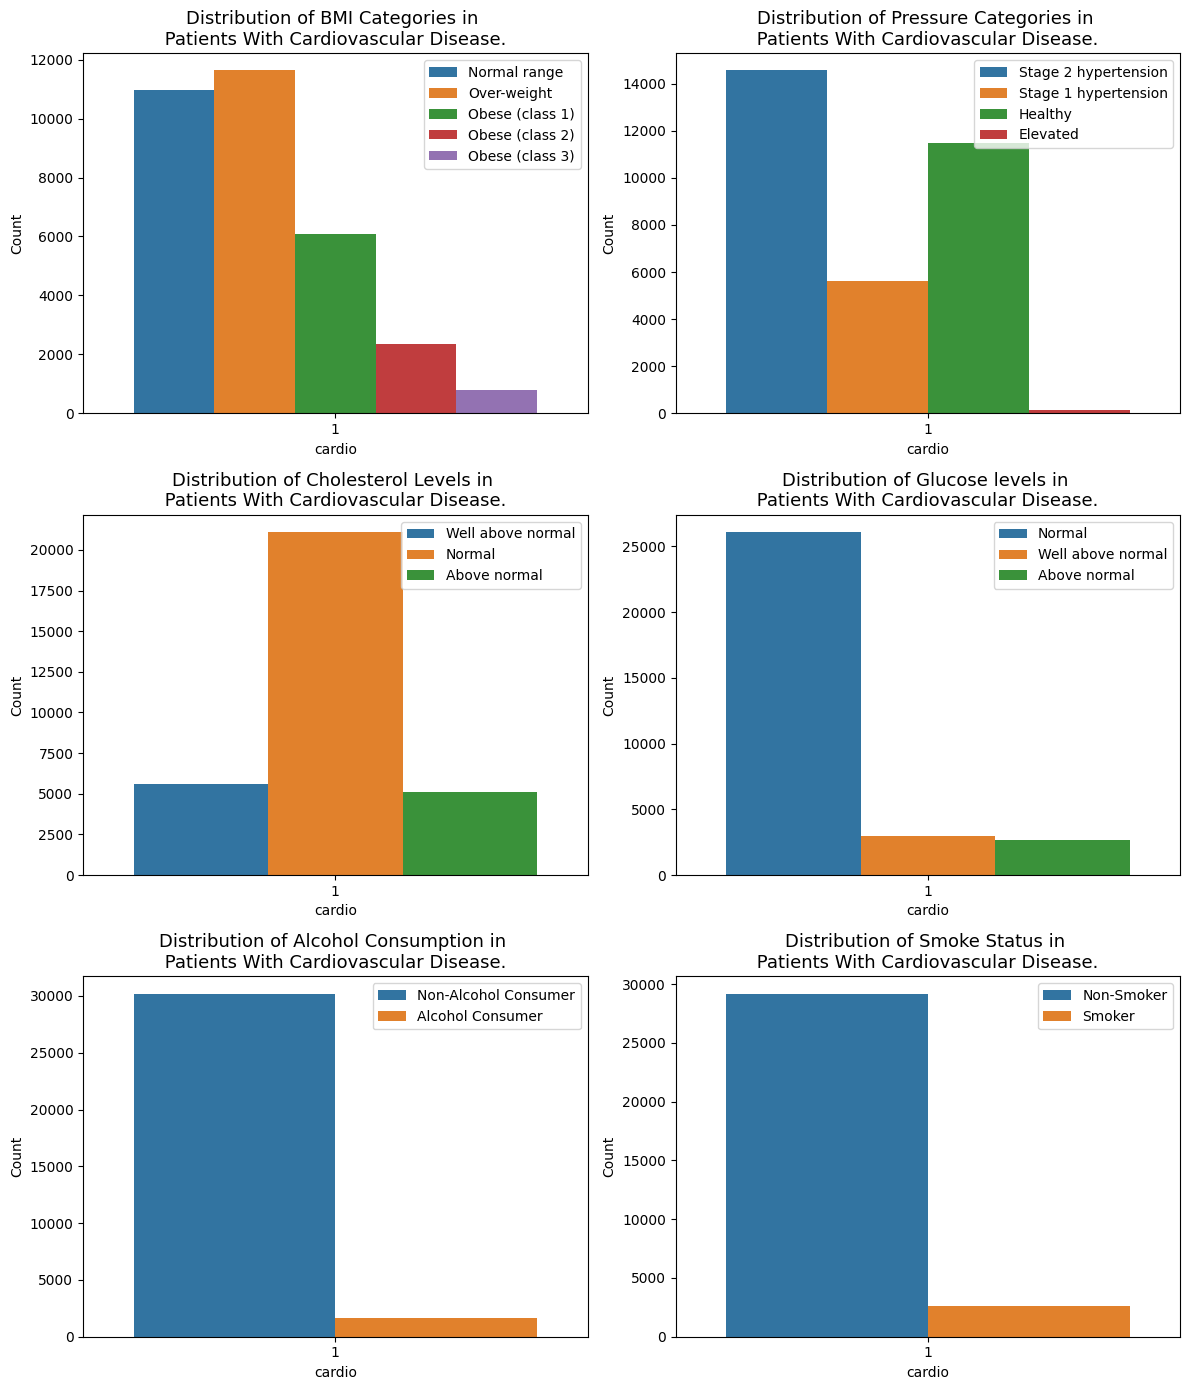

<Axes: title={'center': 'Distribution of Smoke Status in \n Patients With Cardiovascular Disease. '}, xlabel='cardio', ylabel='Count'>

In [43]:
analysis.vis_disease(df)


### Visualization of Correlation.
---

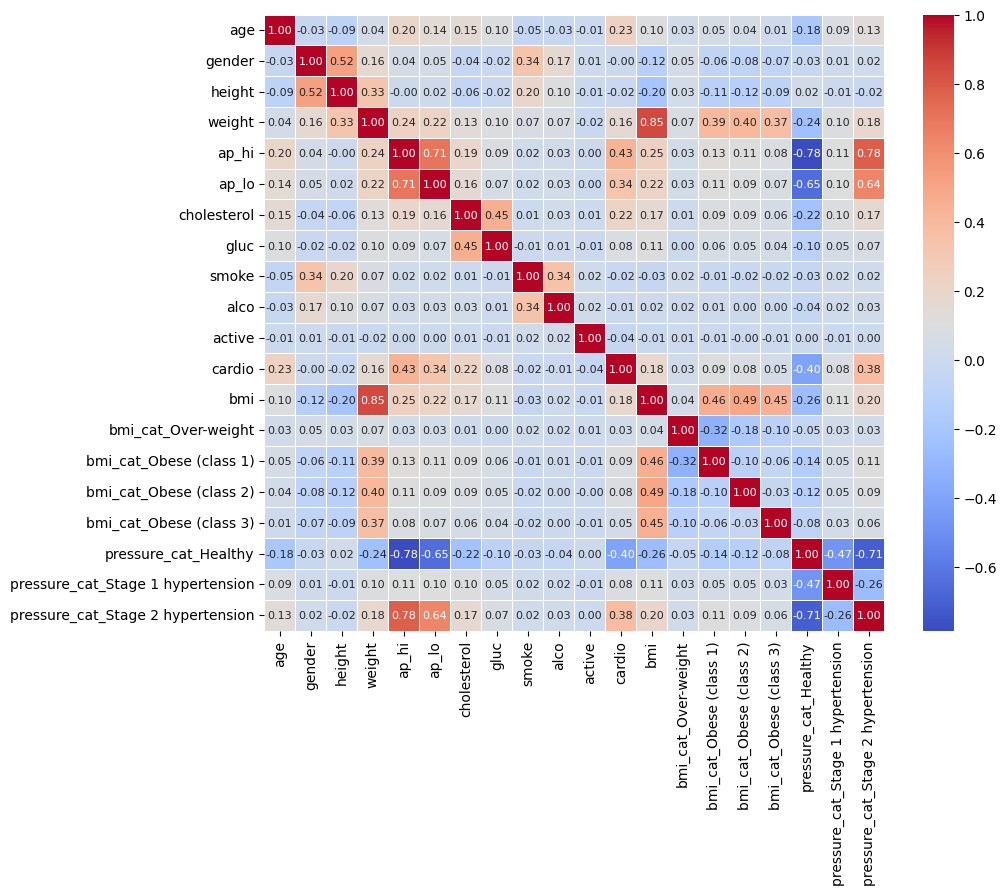

In [44]:
analysis.plot_heat(df);

### Craeting two datasets.
---

In [45]:
df_m = df.copy()
df_m.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_cat,pressure_cat
id,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0,Normal range,Healthy
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,35.0,Obese (class 1),Stage 2 hypertension
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,24.0,Normal range,Stage 1 hypertension
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,29.0,Over-weight,Stage 2 hypertension
8,21914,1,151,67.0,120,80,2,2,0,0,0,0,29.0,Over-weight,Healthy


In [46]:
df_m_01 = df_m.drop(columns=['ap_hi', 'ap_lo', 'height', 'weight', 'bmi'])
df_m_01 = pd.get_dummies(df_m_01, columns = ["bmi_cat", 'pressure_cat',  "gender"], drop_first=True)
df_m_01.head()

,age,cholesterol,gluc,smoke,alco,active,cardio,bmi_cat_Over-weight,bmi_cat_Obese (class 1),bmi_cat_Obese (class 2),bmi_cat_Obese (class 3),pressure_cat_Healthy,pressure_cat_Stage 1 hypertension,pressure_cat_Stage 2 hypertension,gender_2
id,,,,,,,,,,,,,,,
0,18393,1,1,0,0,1,0,False,False,False,False,True,False,False,True
1,20228,3,1,0,0,1,1,False,True,False,False,False,False,True,False
2,18857,3,1,0,0,0,1,False,False,False,False,False,True,False,False
3,17623,1,1,0,0,1,1,True,False,False,False,False,False,True,True
8,21914,2,2,0,0,0,0,True,False,False,False,True,False,False,False


In [47]:
df_m_02 = df_m.drop(columns=['bmi_cat', 'pressure_cat', 'height', 'weight'])
df_m_02 = pd.get_dummies(df_m_02, columns = ["gender"], drop_first=True)
df_m_02.head()

,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,gender_2
id,,,,,,,,,,,
0,18393,110,80,1,1,0,0,1,0,22.0,True
1,20228,140,90,3,1,0,0,1,1,35.0,False
2,18857,130,70,3,1,0,0,0,1,24.0,False
3,17623,150,100,1,1,0,0,1,1,29.0,True
8,21914,120,80,2,2,0,0,0,0,29.0,False


### Machine Learning Models.
---